In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import foldnorm

/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_32853/2452482776.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_32853/2452482776.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[1, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
/var/folders/7y/yhl65v0j5m3g8zj_xwkzq44w0000gn/T/ipykernel_32853/2452482776.py:133: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[1, 0].plot(x, x, 'r', linestyle=LINESTY

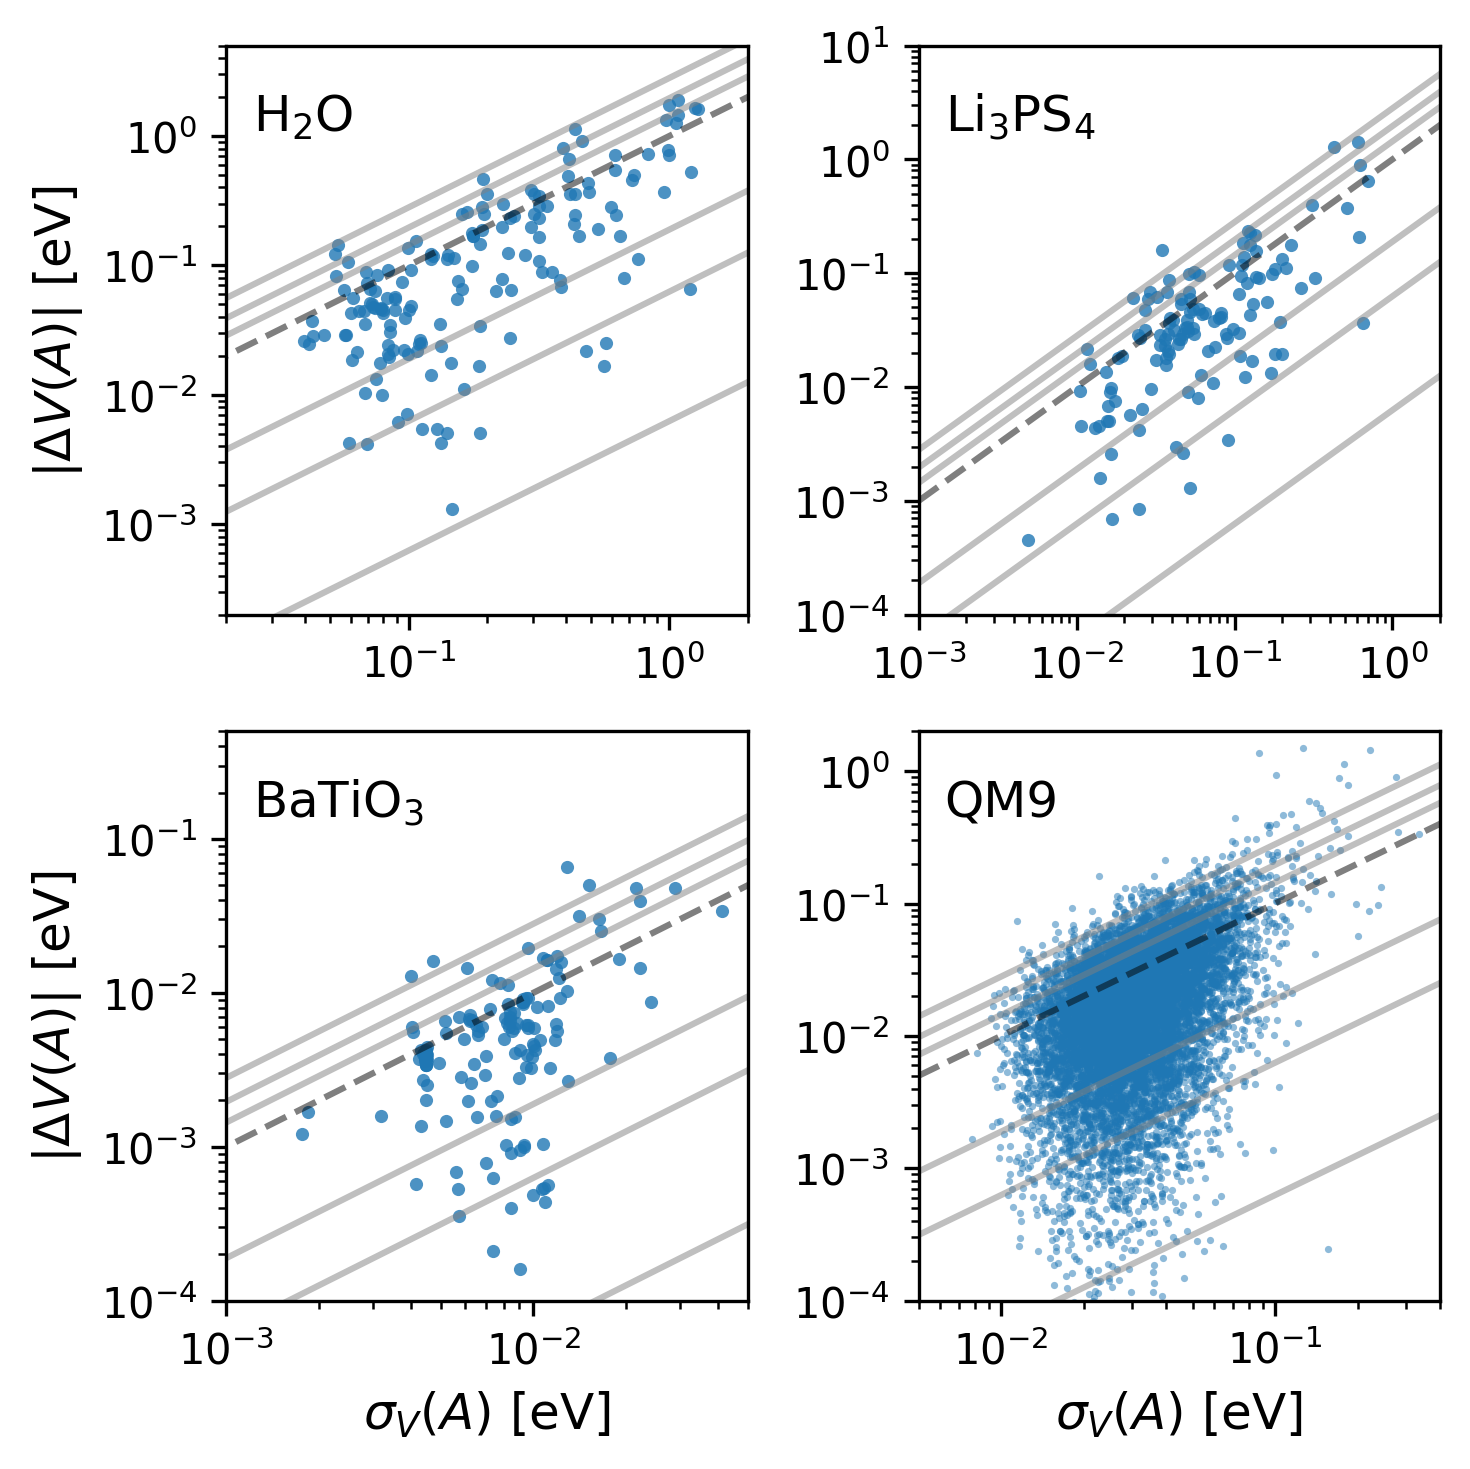

In [3]:



fig, axs = plt.subplots(2, 2, figsize=(5, 5),dpi=300,constrained_layout=True,)
# H2O
x = np.linspace(2e-5, 5e0, 5)


plt.rc('axes', labelsize=12.)
#make the the quantile lines:
noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

hartree_to_ev = 27.2114

LINESTYLE_UNIT = '--'
COLOR_UNIT = 'black'
SCATTER_OPACITY = 0.8
OPACITY_UNIT = 0.5

identifier = "../../Atomistic_experiments/materials_model_predictions/H2O/shallow_ens"

# get metrics for H2O
test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'./{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'./{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)

axs[0, 0].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=10., alpha=SCATTER_OPACITY, rasterized=True, linewidth=0, )
#axs[0, 0].set_title(r'H$_2$O')
#axs[0, 0].set_xlabel(r'$\sigma_{V}$ [eV]')
axs[0, 0].set_ylabel(r'$|\Delta V(A)|$ [eV]')
axs[0, 0].loglog()
axs[0, 0].set_xlim(2e-2, 2e0)
axs[0, 0].set_ylim(2e-4, 5e0)
axs[0, 0].text(0.05, 0.85, r'H$_2$O', fontsize=12, transform=axs[0, 0].transAxes,)

#plot unit line

axs[0, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT)
axs[0, 0].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
axs[0, 0].plot(x, quantiles_lower_005, color='gray', alpha=0.5)




# get metrics for QM9

identifier = "../../Atomistic_experiments/materials_model_predictions/QM9/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten() * hartree_to_ev
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten() * hartree_to_ev **2

val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten() * hartree_to_ev
val_pred_energy = torch.load(f'./{identifier}/val_pred_energy.pt').detach().numpy().flatten()  * hartree_to_ev
val_pred_energy_var = torch.load(f'./{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()  * hartree_to_ev **2


z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)


axs[1, 1].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=3., alpha=0.5, rasterized=True, linewidth=0,)
#axs[1, 1].set_title('QM9')
axs[1, 1].set_xlabel(r'$\sigma_{V}(A)$ [eV]')
#axs[1, 1].set_ylabel(r'$\Delta V$ [eV]')
axs[1, 1].loglog()

axs[1, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)
axs[1, 1].set_xlim(5e-3, 4e-1)
axs[1, 1].set_ylim(1e-4, 2e0)
axs[1, 1].text(0.05, 0.85, 'QM9', fontsize=12, transform=axs[1, 1].transAxes,)




# get metrics for BaTiO3

identifier = "../../Atomistic_experiments/materials_model_predictions/BaTiO3/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()


# now for validation 
val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()

z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)

axs[1, 0].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=10., alpha=SCATTER_OPACITY, rasterized=True, linewidth=0,)
#axs[1, 0].set_title(r'BaTiO$_3$')
axs[1, 0].set_xlabel(r'$\sigma_{V}(A)$ [eV]')
axs[1, 0].set_ylabel(r'$|\Delta V(A)|$ [eV]')
axs[1, 0].loglog()

axs[1, 0].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT, rasterized=True)
axs[1, 0].plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
axs[1, 0].plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)

axs[1, 0].set_xlim(1e-3, 5e-2)
axs[1, 0].set_ylim(1e-4, 5e-1)

axs[1, 0].text(0.05, 0.85, r'BaTiO$_3$', fontsize=12, transform=axs[1, 0].transAxes,)
# get metrics for LiPS

identifier = "../../Atomistic_experiments/materials_model_predictions/LiPS/shallow_ens"

test_energy = torch.load(f'{identifier}/test_energy.pt').detach().numpy().flatten()
test_forces = torch.load(f'{identifier}/test_forces.pt').detach().numpy()
test_pred_energy = torch.load(f'{identifier}/test_pred_energy.pt').detach().numpy().flatten()
test_pred_forces = torch.load(f'{identifier}/test_pred_forces.pt').detach().numpy()
test_pred_energy_var = torch.load(f'{identifier}/test_pred_energy_var.pt').detach().numpy().flatten()


# now for validation 
val_energy = torch.load(f'{identifier}/val_energy.pt').detach().numpy().flatten()
val_forces = torch.load(f'{identifier}/val_forces.pt').detach()
val_pred_energy = torch.load(f'{identifier}/val_pred_energy.pt').detach().numpy().flatten()
val_pred_forces = torch.load(f'{identifier}/val_pred_forces.pt').detach()
val_pred_energy_var = torch.load(f'{identifier}/val_pred_energy_var.pt').detach().numpy().flatten()


z_val_split = np.abs(val_energy-val_pred_energy)
alpha = np.sqrt(np.mean(z_val_split**2/val_pred_energy_var, axis=0))

z = np.abs(test_energy- test_pred_energy)

axs[0, 1].scatter(np.sqrt(test_pred_energy_var)*alpha, z, s=10., alpha=SCATTER_OPACITY, rasterized=True, linewidth=0,)
#axs[0, 1].set_title(r'Li$_3$PS$_4$')
#axs[0, 1].set_xlabel(r'$\sigma_{V}$ [eV]')
#axs[0, 1].set_ylabel(r'$\Delta V$ [eV]')
axs[0, 1].loglog()
axs[0, 1].set_xlim(1e-3, 2e0)
axs[0, 1].set_ylim(1e-4, 1e1)


#plot unit line

axs[0, 1].plot(x, x, 'r', linestyle=LINESTYLE_UNIT, color=COLOR_UNIT, alpha=OPACITY_UNIT)
axs[0, 1].plot(x, quantiles_upper_05, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_lower_05, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_upper_01, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_lower_01, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_upper_005, color='gray', alpha=0.5, rasterized=True)
axs[0, 1].plot(x, quantiles_lower_005, color='gray', alpha=0.5, rasterized=True)

axs[0, 1].text(0.05, 0.85, r'Li$_3$PS$_4$', fontsize=12, transform=axs[0, 1].transAxes,rasterized=True)


# text in first and second line




plt.tight_layout()
plt.savefig('2x2_scatter.pdf', dpi=300, bbox_inches='tight')




